<a href="https://colab.research.google.com/github/MateoProjects/DeepLearning/blob/master/Deep_Learning_Second_IA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Fashion-MNIST

* S'evaluaran articles de Zalando utilitzant un dataset de 70.000 imatges en escala de grisos en 10 categories. 60.000 d'entrenament i 10.000 de test. 

## 1. Imports 

In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras import Sequential
import numpy as np
import matplotlib.pyplot as plt


## 2. Preparació del dataset 

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images , train_labels), (test_images, test_labels) = fashion_mnist.load_data()
#Es crea aquesta llista per un futur
class_name = ['T-shirt' , "Trouser " , "Pullover" , "Dress" , "Coat" , "Sandal" , "Shirt" , "Sneaker" , "Motxila" , "Ankle bot"]
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')
train_images /= 255.0
test_images /= 255.0

## 3. Observació de les dades

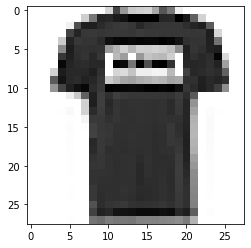

In [ ]:
plt.imshow(train_images[1] , cmap=plt.cm.binary)


## 4. Preparació del model



> El sequential model permet fer un reshape de forma automàtica indicanto camb la funció keras.Layers.Flatten()



In [ ]:
model = Sequential()
model.add(layers.Flatten(input_shape =(28,28)))
model.add(layers.Dense(10, activation='sigmoid', ))
model.add(layers.Dense(10, activation='softmax'))

## 5. Configuració del Model

In [ ]:
model.compile(optimizer='sgd' , loss='sparse_categorical_crossentropy' , metrics=['accuracy'])

## 6. Entrenament del model

In [ ]:
model.fit(train_images , train_labels, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 5s 91us/step - loss: 1.7532 - accuracy: 0.4942
Epoch 2/5
60000/60000 [==============================] - 4s 63us/step - loss: 1.2328 - accuracy: 0.6654
Epoch 3/5
60000/60000 [==============================] - 4s 63us/step - loss: 0.9945 - accuracy: 0.7205
Epoch 4/5
60000/60000 [==============================] - 4s 64us/step - loss: 0.8551 - accuracy: 0.7455
Epoch 5/5
60000/60000 [==============================] - 4s 63us/step - loss: 0.7662 - accuracy: 0.7643


## 7. Evaluació i millora del model

In [ ]:
test_loss , test_acc = model.evaluate(test_images, test_labels)
print("Test accuracy : " , test_acc)

10000/10000 [==============================] - 0s 47us/step
Test accuracy :  0.7594000101089478


## 8. Predicció

[0.02251523 0.85415316 0.01315073 0.03921252 0.04178664 0.00247124
 0.01351612 0.00517431 0.00237794 0.00564218]
1
1


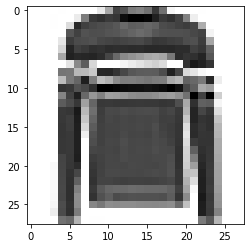

In [ ]:
predictions = model.predict(test_images)
print(predictions[5])
print(np.argmax(predictions[5]))
plt.imshow(train_images[5] , cmap=plt.cm.binary)
print(test_labels[5])

## 9. Millora del Model


> El model obté simplament una precisió del 75% per tant falla bastant. Més endavant s'explicarà però en aquest cas canviant el optimizer per "adam" obtindrem una millor precisió



In [ ]:
model.compile(optimizer='adam' , loss='sparse_categorical_crossentropy' , metrics=['accuracy'])
model.fit(train_images , train_labels, epochs=5)
test_loss , test_acc = model.evaluate(test_images, test_labels)
print("Test accuracy : " , test_acc)

Epoch 1/5
60000/60000 [==============================] - 5s 81us/step - loss: 0.5853 - accuracy: 0.8093
Epoch 2/5
60000/60000 [==============================] - 5s 79us/step - loss: 0.4769 - accuracy: 0.8382
Epoch 3/5
60000/60000 [==============================] - 5s 78us/step - loss: 0.4391 - accuracy: 0.8480
Epoch 4/5
60000/60000 [==============================] - 5s 80us/step - loss: 0.4185 - accuracy: 0.8523
Epoch 5/5
10000/10000 [==============================] - 0s 47us/step
Test accuracy :  0.8357999920845032
